You are a data scientist working for a healthcare company, and you have been tasked with creating a
decision tree to help identify patients with diabetes based on a set of clinical variables. You have been
given a dataset (diabetes.csv) with the following variables:
1. Pregnancies: Number of times pregnant (integer)
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (integer)
3. BloodPressure: Diastolic blood pressure (mm Hg) (integer)
4. SkinThickness: Triceps skin fold thickness (mm) (integer)
5. Insulin: 2-Hour serum insulin (mu U/ml) (integer)
6. BMI: Body mass index (weight in kg/(height in m)^2) (float)
7. DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history) (float)
8. Age: Age in years (integer)
9. Outcome: Class variable (0 if non-diabetic, 1 if diabetic) (integer)

Here’s the dataset link: https://drive.google.com/file/d/1Q4J8KS1wm4-_YTuc389enPh6O-eTNcx2/view?usp=sharing

Your goal is to create a decision tree to predict whether a patient has diabetes based on the other
variables. Here are the steps you can follow:

**Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to understand the distribution and relationships between the variables.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset = pd.read_csv('diabetes.csv') # to load dataset

In [3]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
dataset.describe() #to understand descriptive statistics of dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


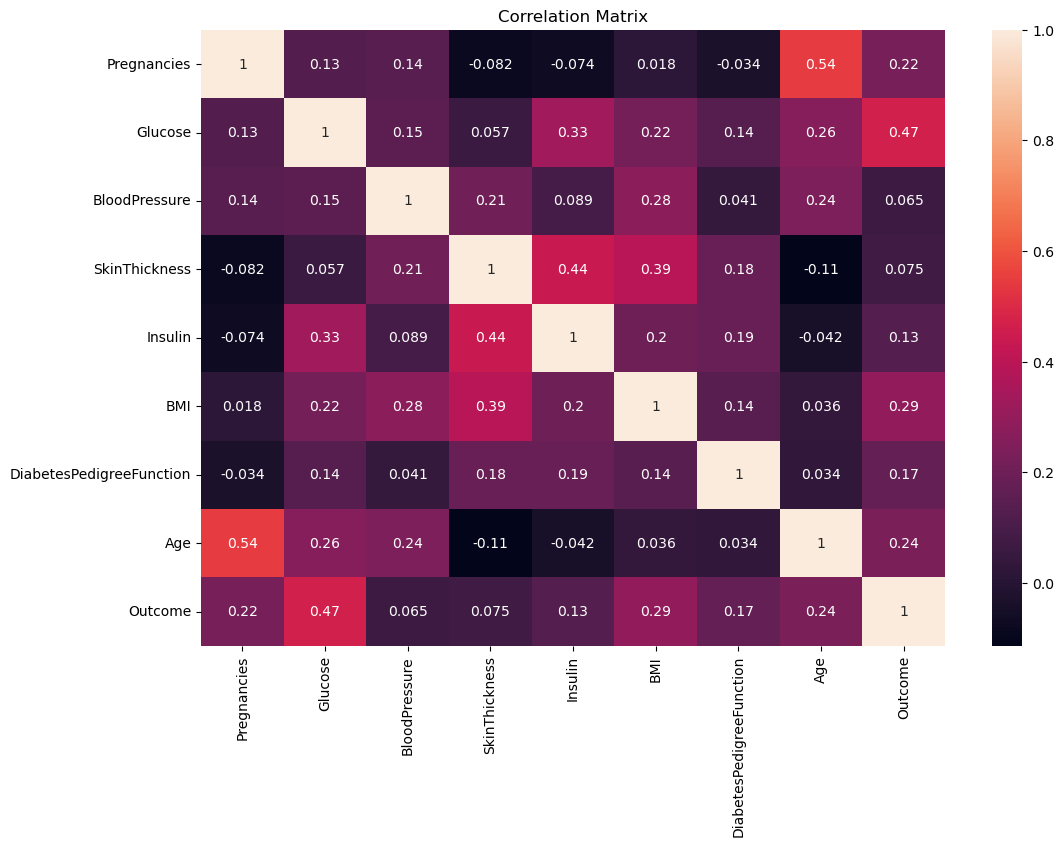

In [5]:
# correlation plot to see relationship between variables
plt.figure(figsize=(12, 8))
sns.heatmap(dataset.corr(),annot=True)
plt.title('Correlation Matrix')
plt.show() 

**Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical variables into dummy variables if necessary.**

In [6]:
dataset['Glucose'] = dataset['Glucose'].replace(0,dataset['Glucose'].mean())
dataset['BloodPressure'] = dataset['BloodPressure'].replace(0,dataset['BloodPressure'].mean())
dataset['SkinThickness'] = dataset['SkinThickness'].replace(0,dataset['SkinThickness'].mean())
dataset['Insulin'] = dataset['Insulin'].replace(0,dataset['Insulin'].mean())
dataset['BMI'] = dataset['BMI'].replace(0,dataset['BMI'].mean())

<AxesSubplot: >

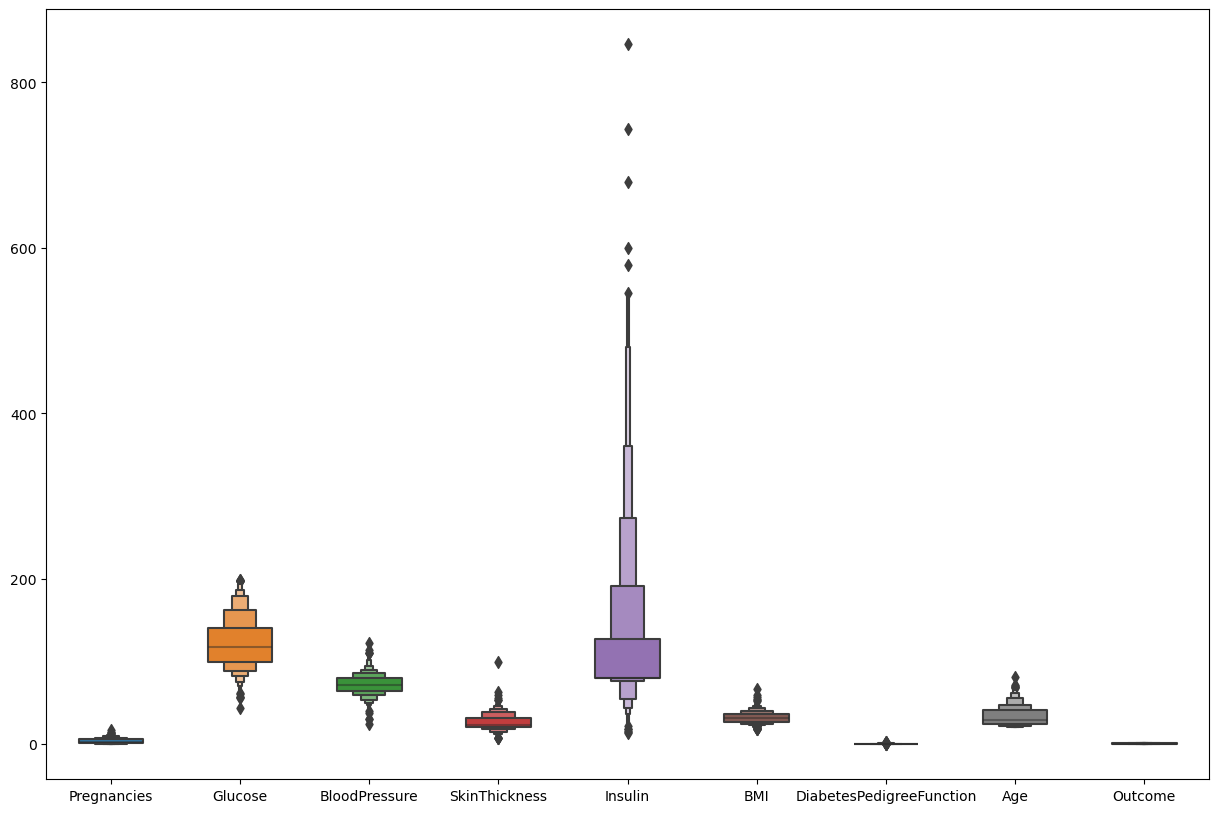

In [7]:
plt.figure(figsize=(15, 10))
sns.boxenplot(data=dataset,width=0.5)

**Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.**

In [8]:
X=dataset.iloc[:,:-1]
y=dataset['Outcome']

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

**Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use cross-validation to optimize the hyperparameters and avoid overfitting.**

In [12]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier

In [13]:
classifire = DecisionTreeClassifier()

In [14]:
parameter = {
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth': [3, 5, 7, 10],
    'max_features':['auto','sqrt','log2']
}

In [15]:
from sklearn.model_selection import GridSearchCV

In [16]:
grid_search = GridSearchCV(classifire,parameter,cv=5,scoring='accuracy')

In [17]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [18]:
best_params = grid_search.best_params_

In [19]:
best_params

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'auto',
 'splitter': 'best'}

In [20]:
best_dt_classifier = DecisionTreeClassifier(**best_params)
best_dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='auto')

In [21]:
y_pred = grid_search.predict(X_test)

In [22]:
y_pred

array([1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0])

**Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy, precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.**

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

In [24]:
print('accuracy score: ',accuracy_score(y_pred,y_test))
print('precision score: ',precision_score(y_pred,y_test))
print('recall score: ',recall_score(y_pred,y_test))
print('f1 score: ',f1_score(y_pred,y_test))

accuracy score:  0.7077922077922078
precision score:  0.5454545454545454
recall score:  0.6
f1 score:  0.5714285714285713


In [25]:
print(confusion_matrix(y_pred,y_test))

[[79 25]
 [20 30]]


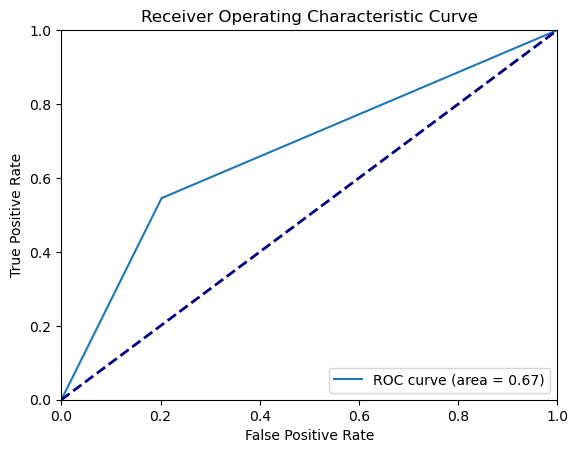

In [26]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

**Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important
variables and their thresholds. Use domain knowledge and common sense to explain the patterns and
trends.**

In [27]:
from sklearn.tree import plot_tree

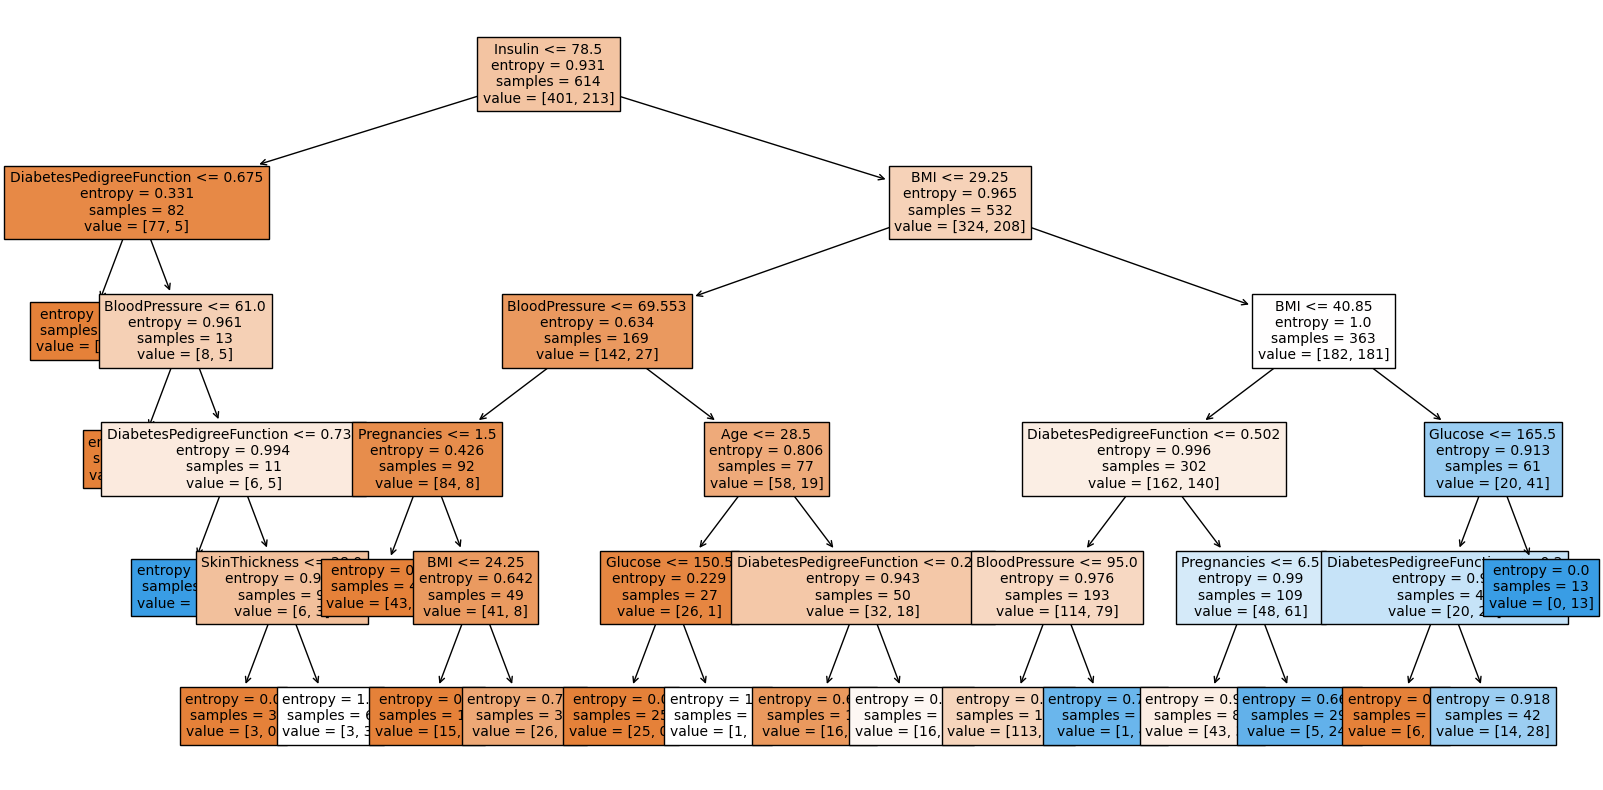

In [28]:
plt.figure(figsize =(20,10))
plot_tree(best_dt_classifier,filled=True,feature_names=X.columns, fontsize=10)
plt.show()

The decision tree suggests that age, blood glucose levels, BMI, and the DPF are all important factors in determining whether someone has diabetes.

**Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and risks.**

In [30]:
# Perform holdout validation multiple times with different random splits
for i in range(5):  # Repeat the process 5 times
    # Split the dataset into training and testing sets with a different random seed each time
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    
    # Train the decision tree model on the training set
    dt_classifier = DecisionTreeClassifier()
    dt_classifier.fit(X_train, y_train)
    
    # Evaluate the model on the testing set
    y_pred_test = dt_classifier.predict(X_test)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    print(f"Iteration {i+1}: Accuracy on Testing Set (Holdout Validation): {accuracy_test}")


Iteration 1: Accuracy on Testing Set (Holdout Validation): 0.7597402597402597
Iteration 2: Accuracy on Testing Set (Holdout Validation): 0.6883116883116883
Iteration 3: Accuracy on Testing Set (Holdout Validation): 0.7272727272727273
Iteration 4: Accuracy on Testing Set (Holdout Validation): 0.6168831168831169
Iteration 5: Accuracy on Testing Set (Holdout Validation): 0.7012987012987013
